In [24]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.1 MB/s et

In [25]:
import gradio as gr

In [8]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
!git clone https://github.com/OPet-OnlineDiagnosisforYourPet-sDisease/MachineLearning.git

!ls MachineLearning/dataset

!unzip MachineLearning/dataset/dogSkinDisease.zip -d /content/dogSkinDisease

!ls /content/dogSkinDisease

Cloning into 'MachineLearning'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 56 (delta 4), reused 5 (delta 2), pack-reused 45
Receiving objects: 100% (56/56), 50.48 MiB | 13.64 MiB/s, done.
Resolving deltas: 100% (16/16), done.
dogSkinDisease.zip  pre_processed.csv  symptoms_data.csv
Archive:  MachineLearning/dataset/dogSkinDisease.zip
   creating: /content/dogSkinDisease/test/flea_allergy/
  inflating: /content/dogSkinDisease/test/flea_allergy/flea_allergy (11).jpg  
  inflating: /content/dogSkinDisease/test/flea_allergy/flea_allergy (14).jpg  
  inflating: /content/dogSkinDisease/test/flea_allergy/flea_allergy (17).jpg  
  inflating: /content/dogSkinDisease/test/flea_allergy/flea_allergy (19).jpg  
  inflating: /content/dogSkinDisease/test/flea_allergy/flea_allergy (24).jpg  
  inflating: /content/dogSkinDisease/test/flea_allergy/flea_allergy (25).jpg  
  inflating: /content/dogSkin

In [3]:
import pathlib
data_dir = pathlib.Path('/content/dogSkinDisease/train')

/content/dogSkinDisease/train/hotspot/hotspot (70).jpg


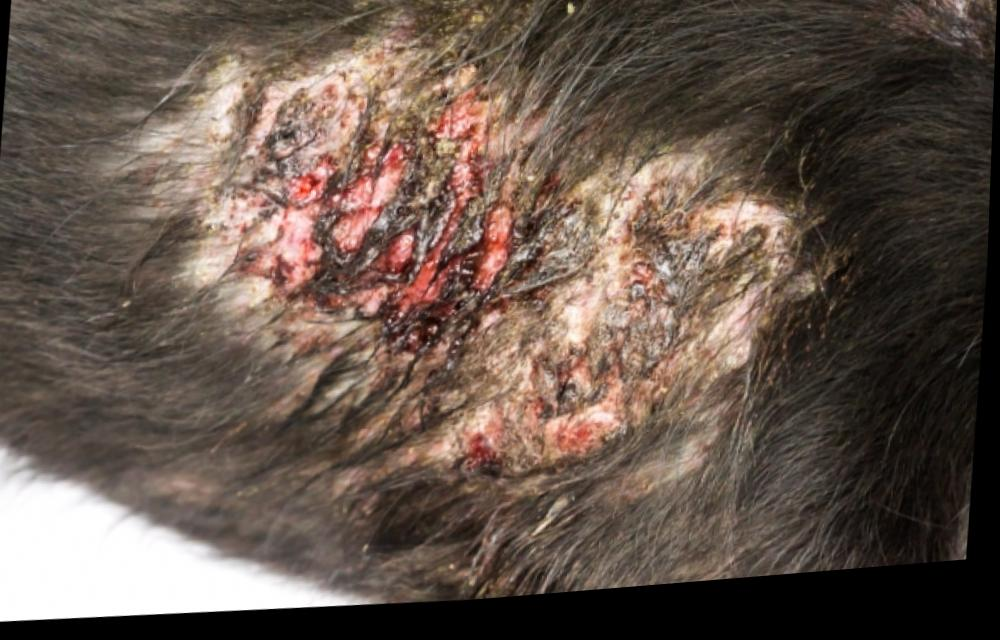

In [4]:
hotspot = list(data_dir.glob('hotspot/*'))
print(hotspot[0])
PIL.Image.open(str(hotspot[0]))

/content/dogSkinDisease/train/mange/mange (14).jpg


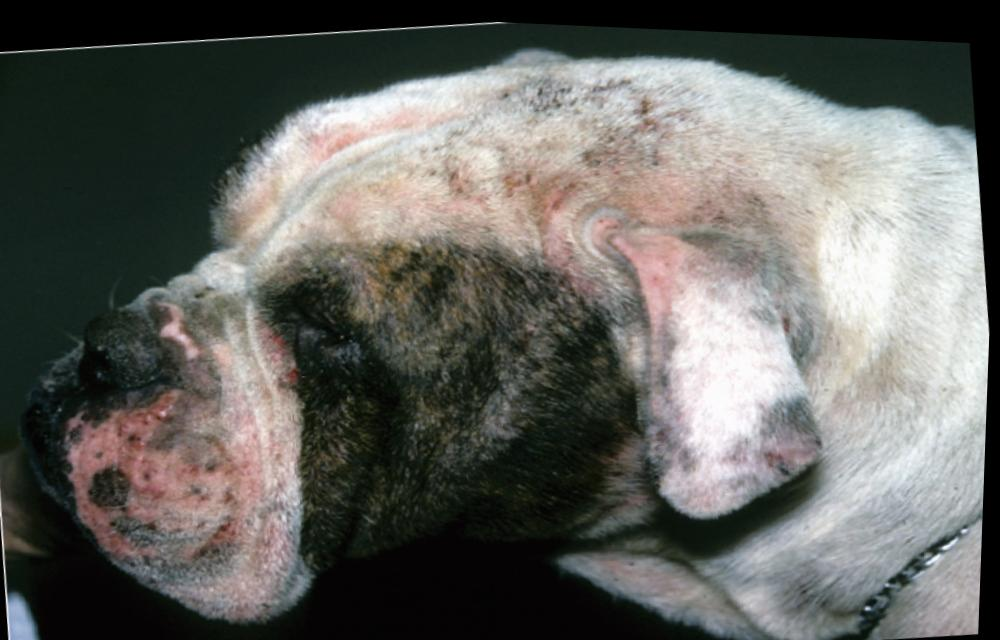

In [5]:
mange = list(data_dir.glob('mange/*'))
print(mange[0])
PIL.Image.open(str(mange[0]))

/content/dogSkinDisease/train/flea_allergy/flea_allergy (44).jpg


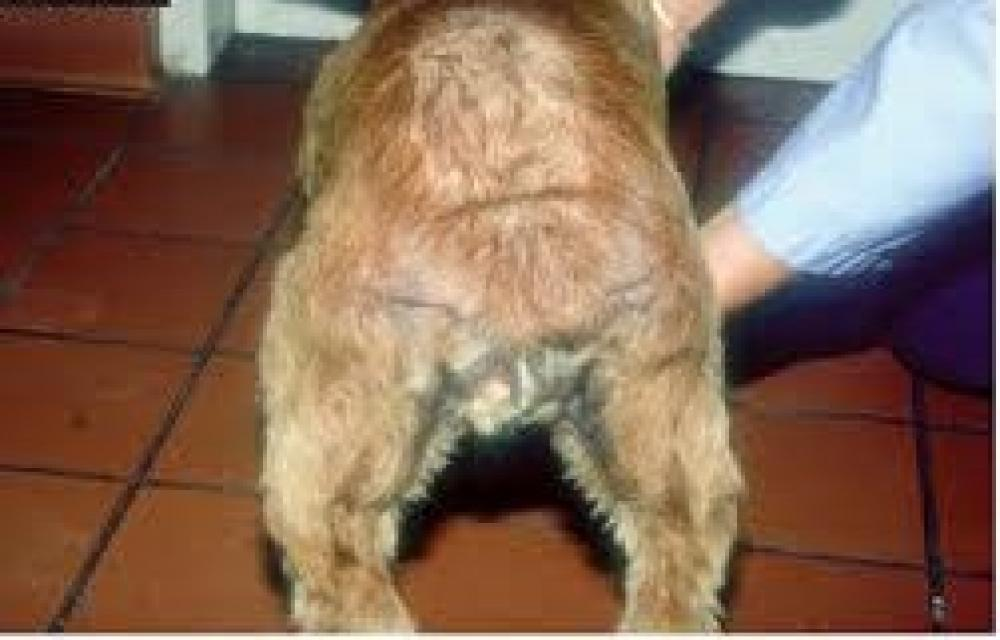

In [6]:
flea = list(data_dir.glob('flea_allergy/*'))
print(flea[0])
PIL.Image.open(str(flea[0]))

/content/dogSkinDisease/train/ringworm/ringworm (124).jpg


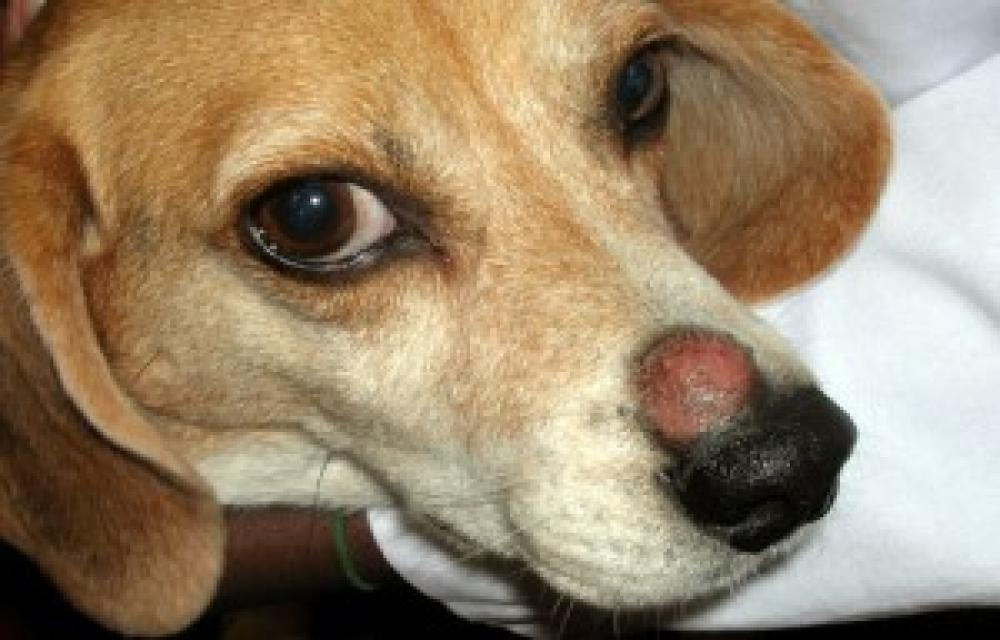

In [7]:
ringworm = list(data_dir.glob('ringworm/*'))
print(ringworm[0])
PIL.Image.open(str(ringworm[0]))

In [9]:
datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2, rotation_range=10,
                             width_shift_range=0.1, height_shift_range=0.1,
                             shear_range=0.1, zoom_range=0.1, horizontal_flip=True)

train_gen = datagen.flow_from_directory(data_dir,
                                        target_size= (150,150),
                                        batch_size=32,
                                        class_mode='categorical',
                                        subset='training')

val_gen = datagen.flow_from_directory(data_dir,
                                        target_size= (150,150),
                                        batch_size=32,
                                        class_mode='categorical',
                                        subset='validation')

Found 300 images belonging to 4 classes.
Found 73 images belonging to 4 classes.


In [ ]:
# img_height,img_width=180,180
# batch_size=32
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

Found 373 files belonging to 4 classes.
Using 299 files for training.


In [ ]:
# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

Found 373 files belonging to 4 classes.
Using 74 files for validation.


In [10]:
class_names = train_gen.class_indices
print(class_names)

{'flea_allergy': 0, 'hotspot': 1, 'mange': 2, 'ringworm': 3}


In [11]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 10))
# for images, labels in train_gen.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

AttributeError: 'DirectoryIterator' object has no attribute 'take'

<Figure size 1000x1000 with 0 Axes>

In [12]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

In [14]:
base_model = VGG16(include_top=False, input_shape=(150, 150, 3))
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4, activation='softmax')(x)

model = Model(base_model.input, x)

In [ ]:
# data_augmentation = Sequential([
#   layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
#   layers.RandomRotation(0.1),
#   layers.RandomZoom(0.1),
# ])

In [ ]:
# num_classes = 4

# model = Sequential([
#   data_augmentation,
#   layers.experimental.preprocessing.Rescaling(1./255),
#   layers.Conv2D(32, 3, padding='same', activation='relu'),
#   layers.BatchNormalization(),
#   layers.MaxPooling2D(),
#   layers.Dropout(0.2),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.BatchNormalization(),
#   layers.MaxPooling2D(),
#   layers.Dropout(0.2),
#   layers.Conv2D(128, 3, padding='same', activation='relu'),
#   layers.BatchNormalization(),
#   layers.MaxPooling2D(),
#   layers.Dropout(0.2),
#   layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dropout(0.5),
#   layers.Dense(num_classes, activation='softmax')
# ])

In [ ]:
# lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [15]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history = model.fit(train_gen, epochs=10, validation_data=val_gen)

Epoch 1/10
10/10 [==============================] - 104s 10s/step - loss: 0.7223 - accuracy: 0.7333 - val_loss: 1.2339 - val_accuracy: 0.4384
Epoch 2/10
10/10 [==============================] - 103s 10s/step - loss: 0.7122 - accuracy: 0.7200 - val_loss: 1.2135 - val_accuracy: 0.4795
Epoch 3/10
10/10 [==============================] - 103s 10s/step - loss: 0.6707 - accuracy: 0.7600 - val_loss: 1.2285 - val_accuracy: 0.4384
Epoch 4/10
10/10 [==============================] - 104s 10s/step - loss: 0.6107 - accuracy: 0.7733 - val_loss: 1.2933 - val_accuracy: 0.4795
Epoch 5/10
10/10 [==============================] - 106s 11s/step - loss: 0.6731 - accuracy: 0.7167 - val_loss: 1.2581 - val_accuracy: 0.5205
Epoch 6/10
10/10 [==============================] - 101s 10s/step - loss: 0.5949 - accuracy: 0.7700 - val_loss: 1.2274 - val_accuracy: 0.4658
Epoch 7/10
10/10 [==============================] - 104s 11s/step - loss: 0.5860 - accuracy: 0.8067 - val_loss: 1.1881 - val_accuracy: 0.5068
Epoch 

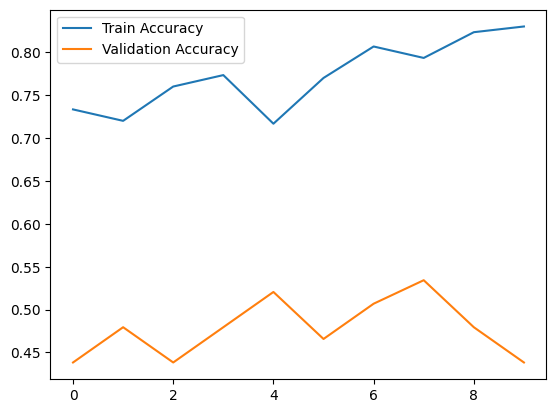

In [19]:
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'])

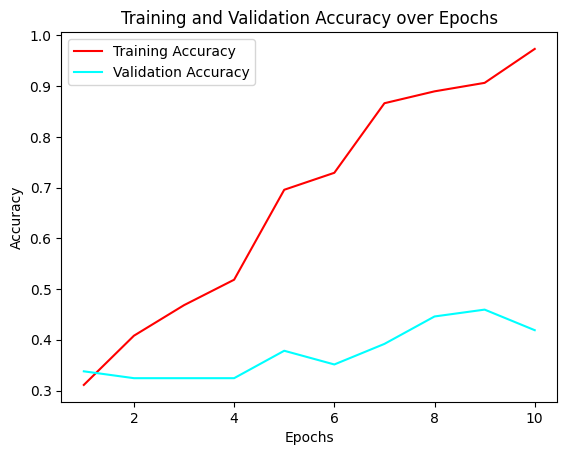

In [ ]:
# import matplotlib.pyplot as plt

# epochs = range(1, 11)

# plt.plot(epochs, history.history['accuracy'], color='red', label='Training Accuracy')
# plt.plot(epochs, history.history['val_accuracy'], color='cyan', label='Validation Accuracy')

# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.title("Training and Validation Accuracy over Epochs")
# plt.legend()

# plt.show()

3/3 [==============================] - 24s 5s/step - loss: 1.2093 - accuracy: 0.4795
Validation Loss: 1.2093424797058105
Validation Accuracy: 0.4794520437717438
3/3 [==============================] - 19s 6s/step


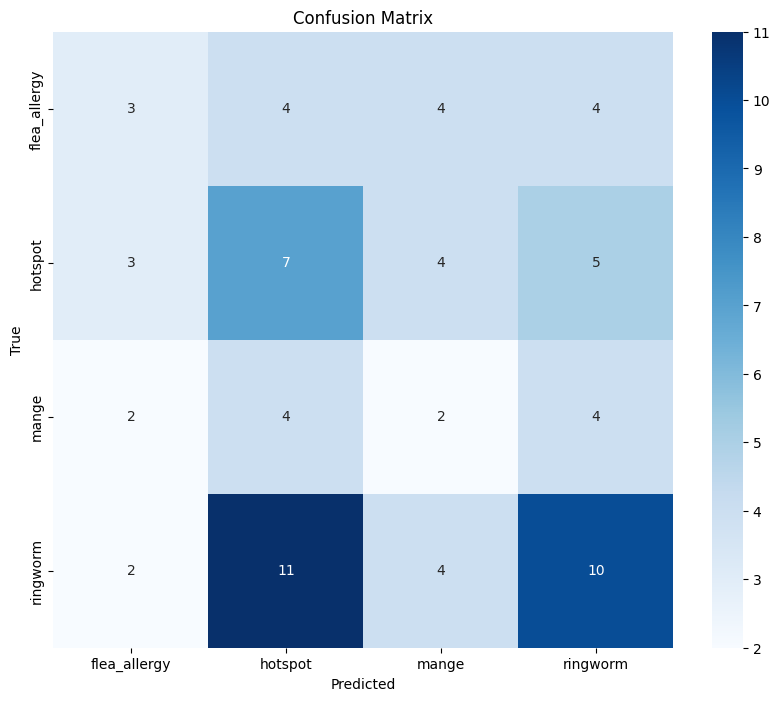

In [20]:
val_loss, val_accuracy = model.evaluate(val_gen)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

predictions = model.predict(val_gen)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = val_gen.classes
class_labels = list(val_gen.class_indices.keys())

conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [46]:
class_labels = list(val_gen.class_indices.keys())
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

              precision    recall  f1-score   support

flea_allergy       0.30      0.20      0.24        15
     hotspot       0.27      0.37      0.31        19
       mange       0.14      0.17      0.15        12
    ringworm       0.43      0.37      0.40        27

    accuracy                           0.30        73
   macro avg       0.29      0.28      0.28        73
weighted avg       0.32      0.30      0.30        73



In [39]:
Dfrom keras.preprocessing.image import load_img, img_to_array

def predict_image(img):
  img = load_img(img, target_size=(150, 150))
  plt.imshow(img)
  plt.axis('off')
  plt.show()
  input_arr = img_to_array(img)
  input_arr = np.array([input_arr])
  prediction = model.predict(input_arr)[0]
  class_indices = {v: k for k, v in train_gen.class_indices.items()}
  result = {class_indices[i]: float(prediction[i]) for i in range(len(prediction))}
  return result

In [36]:
class_names

AttributeError: 'dict' object has no attribute 'dtypes'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


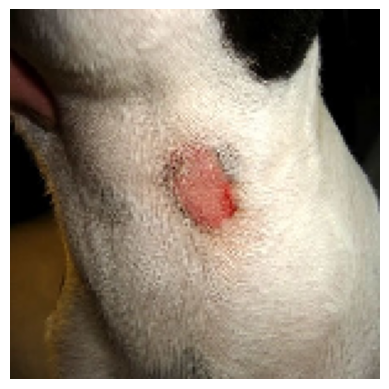

1/1 [==============================] - 0s 273ms/step


{'flea_allergy': 0.0, 'hotspot': 0.0, 'mange': 0.0, 'ringworm': 1.0}

In [40]:
predict_image('/content/01_Ringworm.jpg')

In [41]:
import tempfile

def predict_from_array(img_array):
    temp_img_path = None
    try:
        # Create a temporary file to save the image
        temp_img = tempfile.NamedTemporaryFile(delete=False, suffix='.jpg')
        temp_img_path = temp_img.name
        temp_img.close()

        # Save the image array to the temporary file
        img = PIL.Image.fromarray(img_array)
        img.save(temp_img_path)

        # Predict using the temporary file path
        result = predict_image(temp_img_path)
    finally:
        # Remove the temporary file
        if temp_img_path and os.path.exists(temp_img_path):
            os.remove(temp_img_path)

    return result

In [42]:
image = gr.Image()
label = gr.Label(num_top_classes=4)

gr.Interface(fn=predict_from_array, inputs=image, outputs=label).launch(debug='True')

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://16df3af4d5bec81f2b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 260ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://16df3af4d5bec81f2b.gradio.live


In [43]:
model.save("ModelVGG Disease.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [44]:
model.save("ModelVGG Disease.keras")